In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import seaborn as sns
import re
import numpy as np
import matplotlib.colors as mcolors
import networkx as nx  
import ast
from data_transform import extract_hold_data, get_coordinates, color_mapping, compute_hold_id, generate_id_mapping, get_numeric_id, map_hold_skus

In [2]:
df_climbs_angles = pd.read_csv('data/csvs/climbs_with_angles.csv', low_memory=False)
df_climbs = pd.read_csv('data/csvs/climbs.csv')
df_holes = pd.read_csv('data/csvs/holes.csv')
df_colors = pd.read_csv('data/csvs/placement_roles.csv')
df_vscale = pd.read_csv('data/csvs/vscale.csv')

kilter_xlim = 144
kilter_ylim = 156

In [3]:
# df_climbs['ids'] = df_climbs['frames'].apply(lambda x: extract_hold_data(x)[0::2])
# df_climbs['colors'] = df_climbs['frames'].apply(lambda x: extract_hold_data(x)[1::2])
# df_climbs['coordinates'] = df_climbs['ids'].apply(lambda x: get_coordinates(x, df_holes))
# df_climbs['normalized_coordinates'] = df_climbs['ids'].apply(lambda x: get_coordinates(x, df_holes, normalize=True))
# color_mapping = df_colors.set_index('id')['full_name'].to_dict()
# df_climbs['hold_type'] = df_climbs.colors.apply(
#         lambda x: [
#             color_mapping.get(color) 
#             if color else None
#             for color in x
#         ]
#     )

In [4]:
def plot_climb_by_id(id=1):   
    hold_pos = np.asarray(ast.literal_eval(df_climbs['coordinates'][id]))    
    color_ids = ast.literal_eval(df_climbs['colors'][id])
    colors = [color_mapping(color_id, df_colors) for color_id in color_ids]
    print("Colors: ", colors)
    x_limits = [0, kilter_xlim]
    y_limits = [0, kilter_ylim]
    plt.gca().add_patch(Rectangle((x_limits[0], y_limits[0]), x_limits[1]-x_limits[0], y_limits[1]-y_limits[0], facecolor='grey', zorder=0))
    img1 = mpimg.imread('data/pngs/kilter_large_holds.png')  
    plt.imshow(img1, extent=[x_limits[0], x_limits[1], y_limits[0], y_limits[1]], zorder=1)  
    x = hold_pos[:, 0]
    y = hold_pos[:, 1]  
    plt.scatter(x, y, facecolors='none', edgecolors=colors, s=100, linewidth=1.5, zorder=3)
    plt.axis('off')
    plt.xlim(x_limits)
    plt.ylim(y_limits)
    plt.gca().set_title(df_climbs['name'][id], fontsize=18)
    
    plt.show()

In [5]:
def plot_stats(id=1):
    subset_df = df_climbs_angles.loc[df_climbs_angles['uuid'] == df_climbs['uuid'][id]]
    subset_df = subset_df.sort_values(by='angle')
    subset_df['display_difficulty'] = subset_df['display_difficulty'].astype(int)
    df_vscale['difficulty'] = df_vscale['difficulty'].astype(int)
    subset_df = pd.merge(subset_df, df_vscale, 
                         left_on='display_difficulty', right_on='difficulty', 
                         how='left')
    sns.set_style("whitegrid")
    sns.set_context("talk")  
    subset_df['boulder_name'] = pd.Categorical(subset_df['boulder_name'], 
                                               categories=df_vscale['boulder_name'], 
                                               ordered=True)
    subset_df = subset_df.sort_values('boulder_name')

    boulder_names_present = subset_df['boulder_name'].unique()
    custom_palette = sns.color_palette("viridis", n_colors=len(boulder_names_present))
    color_mapping = dict(zip(boulder_names_present, custom_palette))
    # Create the plot
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.scatterplot(data=subset_df, 
                    x='angle', 
                    y='ascensionist_count', 
                    hue="boulder_name",
                    palette=color_mapping,
                    hue_order=boulder_names_present,  # Use boulder names from subset_df
                    s=100,  
                    edgecolor='white', 
                    linewidth=0.5, 
                    ax=ax)

    sns.lineplot(data=subset_df, x='angle', y='ascensionist_count', color='gray', linestyle='dashed', ax=ax)
    ax.set_title('Ascensionist Count vs. Angle', fontsize=18, pad=10)
    ax.set_xlabel('Angle', fontsize=16)
    ax.set_ylabel('Ascensionist Count', fontsize=16)
    legend = ax.legend(title='Difficulty', bbox_to_anchor=(1, 1.2), loc='upper left', frameon=False)
    plt.setp(legend.get_title(), fontsize=14)  
    plt.setp(legend.get_texts(), fontsize=12)  
    plt.tight_layout()
    plt.show()


Colors:  ['#FFA500', '#FFA500', '#00DD00', '#00DD00', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#FF00FF']


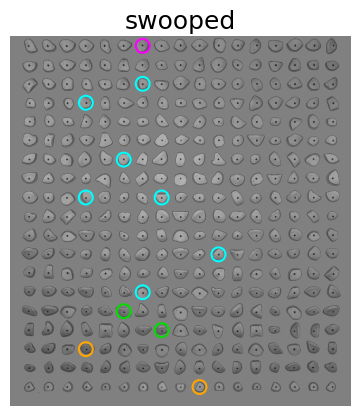

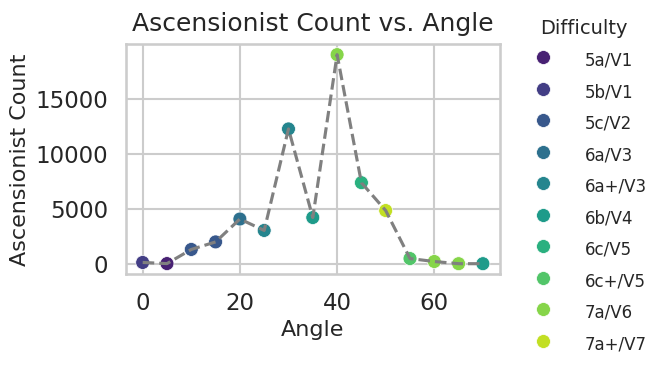

In [6]:
id = 1
plot_climb_by_id(id)
plot_stats(id)

Colors:  ['#FFA500', '#FFA500', '#00DD00', '#00DD00', '#00FFFF', '#00FFFF', '#FFA500', '#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#FF00FF']


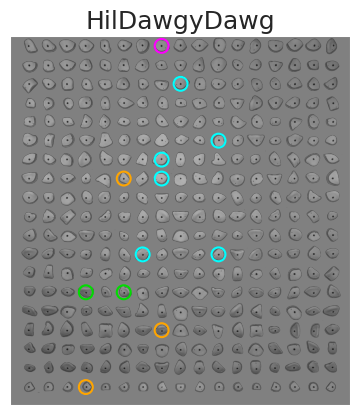

[[32, 8], [64, 32], [32, 48], [48, 48], [56, 64], [88, 64], [48, 96], [64, 96], [64, 104], [88, 112], [72, 136], [64, 152]]


In [7]:
id = df_climbs.query("name == 'Boot Spur'").index.to_flat_index()[0]
plot_climb_by_id(5)
test = df_climbs['coordinates'][5]
print(test)



In [8]:
df_climbs_angles.loc[df_climbs_angles['name'] == 'swooped'][["display_difficulty", "angle", "ascensionist_count"]]

,display_difficulty,angle,ascensionist_count
15,14.6897,0,116
16,13.2143,5,14
17,15.9723,10,1299
18,15.9995,15,1983
19,16.0475,20,4064
20,17.9323,25,3026
21,17.9601,30,12250
22,18.0503,35,4198
23,22.0000,40,18999
24,20.0291,45,7366


## Some general plots on hold types and angels of the holds

/tmp/ipykernel_2842/3500593419.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(skus_grid.applymap(lambda x: sku_map[x]), cmap='hsv', cbar=True)


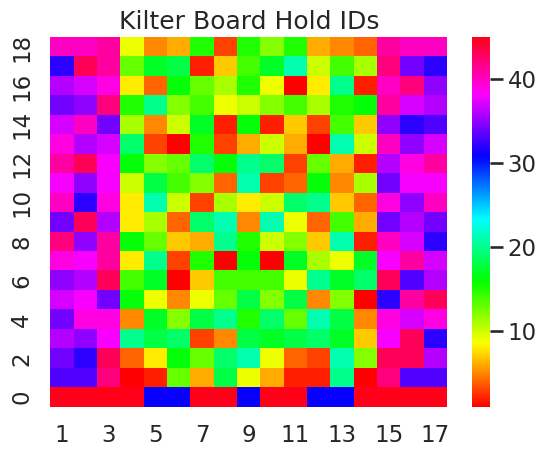

In [9]:
skus_grid = pd.read_csv('data/csvs/KB_12x12_skus_only.csv').iloc[::-1]
angle_grid = pd.read_csv('data/csvs/KB_12x12_angles_only.csv').iloc[::-1]
skus = pd.read_csv('data/csvs/KB_skus.csv')
skus.SKU.unique()
sku_map = dict(zip(skus.SKU.unique(), range(1, len(skus.SKU.unique())+1)))
plt.title('Kilter Board Hold IDs')

sns.heatmap(skus_grid.applymap(lambda x: sku_map[x]), cmap='hsv', cbar=True)
plt.show()

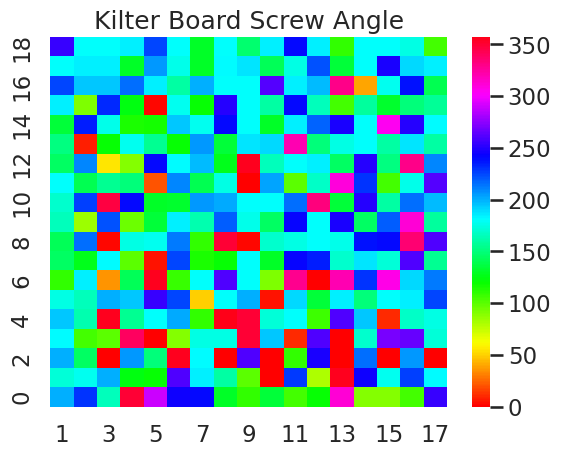

In [10]:
plt.title('Kilter Board Screw Angle')
sns.heatmap(angle_grid, cmap='hsv', cbar=True)
plt.show()

## Heatmap of used used holds per difficulty

<Axes: xlabel='difficulty', ylabel='Count'>

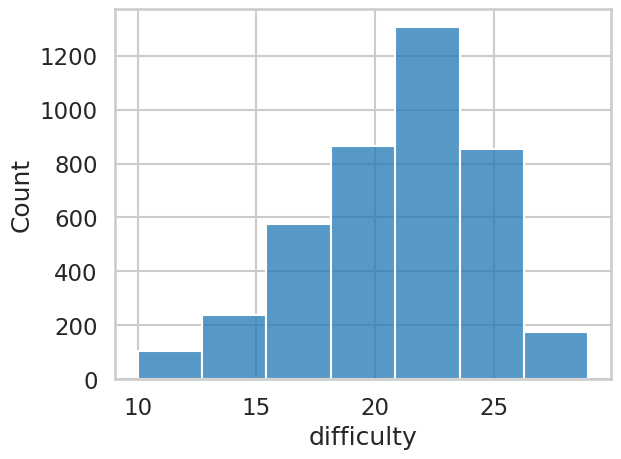

In [50]:
sns.histplot(df_train.difficulty, bins=7)

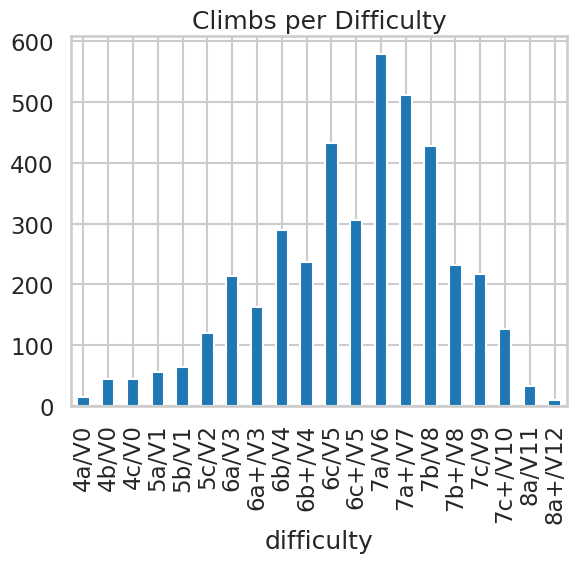

In [129]:
ax = df_train.difficulty.apply(lambda x: np.round(x)).value_counts().sort_index().plot(kind='bar')
ax.set_title('Climbs per Difficulty')
ax.set_xticklabels(df_vscale.boulder_name.values[9:-10])
plt.show()

In [249]:
from collections import defaultdict

def node_count(node_column):
    dict_node_count = defaultdict(int)
    for row in node_column:
        for entry in row:
            dict_node_count[entry] += 1
    return dict_node_count


df_train.difficulty = df_train.difficulty.apply(np.round)

# Creating a mapping for difficulties to readable labels
difficulty_mapping = {
    tuple(range(10, 13)): "4",
    tuple(range(13, 16)): "5",
    tuple(range(16, 19)): "6a-6b",
    tuple(range(19, 22)): "6b+-6c+",
    tuple(range(22, 25)): "7a-7b",
    tuple(range(25, 28)): "7b+-7c",
    tuple(range(28, 31)): ">8a"
}

all_node_counts = {}

for diff_range, label in difficulty_mapping.items():
    relevant_df = df_train[df_train.difficulty.isin(diff_range)]
    all_node_counts[label] = node_count(relevant_df.nodes)



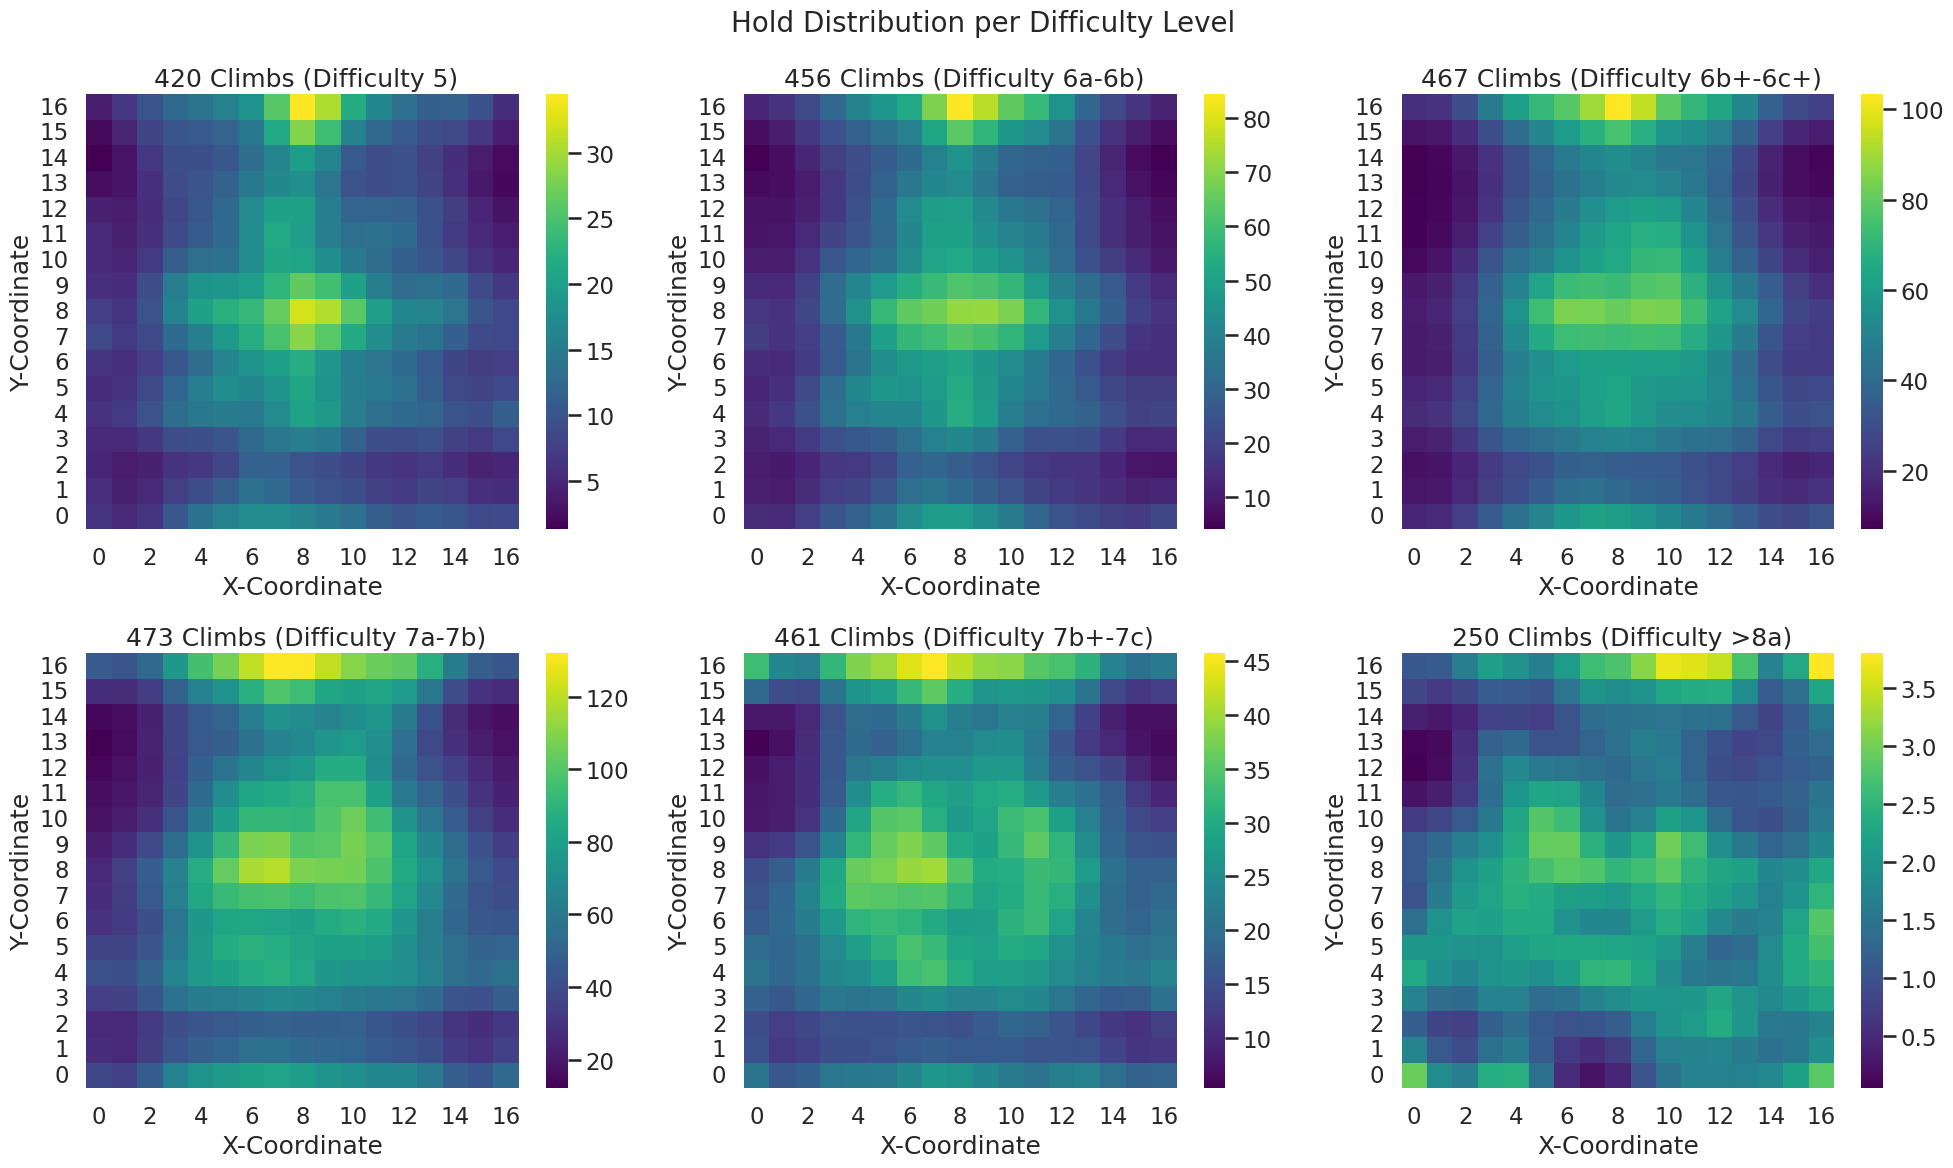

In [272]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import gaussian_filter

difficulties = ["5", "6a-6b", "6b+-6c+", "7a-7b", "7b+-7c", ">8a"]
fig, axs = plt.subplots(2, 3, figsize=(20, 12))  
fig.suptitle('Hold Distribution per Difficulty Level', fontsize=20)
axs = axs.flatten()  

for i, difficulty in enumerate(difficulties):
    coordinates = df_nodes.loc[list(all_node_counts[difficulty].keys())][['x', 'y']].values
    values = np.array(list(all_node_counts[difficulty].values()))
    grid_size = 18  
    x_max, y_max = np.max(coordinates, axis=0)
    x_bins = np.linspace(0, x_max, grid_size)
    y_bins = np.linspace(0, y_max, grid_size)

    grid, _, _ = np.histogram2d(coordinates[:,0], coordinates[:,1], bins=[x_bins, y_bins], weights=values)

    # Applying Gaussian smoothing
    sigma = 1  # Standard deviation of the Gaussian filter. You might adjust this value.
    smoothed_grid = gaussian_filter(grid, sigma=sigma)
    
    sns.heatmap(smoothed_grid.T, cmap='viridis', annot=False, ax=axs[i])
    axs[i].set_title(f' {len(all_node_counts[difficulty].keys())} Climbs (Difficulty {difficulty})')
    axs[i].set_xlabel('X-Coordinate')
    axs[i].set_ylabel('Y-Coordinate')
    axs[i].invert_yaxis()  

plt.tight_layout()
plt.show()

## How are the holds combined into a graph?
Lets look again at the most climbed problem SWOOPED by @jwebxl

In [31]:
df_climbs[['coordinates', 'hold_type']].loc[1]

coordinates    [[80, 8], [32, 24], [64, 32], [48, 40], [56, 4...
hold_type      ['Foot Only', 'Foot Only', 'Start', 'Start', '...
Name: 1, dtype: object

Now we can create a dictionary which stores additional information for each of the nodes/holds

In [32]:
df_nodes = pd.read_csv('data/csvs/nodes.csv')
df_nodes.loc[(df_nodes.x == 80) & (df_nodes.y == 8)]
df_nodes['hold_type'] = df_nodes['name'].apply(lambda x: x.split('_')[0])

Lets create the node feature matrix as well as the graph matrix 

In [33]:
df_train = df_climbs[['uuid', 'coordinates', 'hold_type']].copy()
def get_index(coords):
    df_filtered = df_nodes.loc[(df_nodes.x == coords[0]) & (df_nodes.y == coords[1])]
    if not df_filtered.empty:
        return df_filtered.index[0]
    else:
        return None 
df_train['nodes'] = df_train.coordinates.map(lambda x: np.array([get_index(coords) for coords in ast.literal_eval(x)]))
print(f'There are a total of {df_train.shape[0]} climbs in the dataset') 

There are a total of 7657 climbs in the dataset


Adding the difficulty column which will be out prediction target. For now lets select the difficulty at 40° as it is the most climbed --> most reliable data

In [34]:
def get_difficulty(uuid):
    df_filtered = df_climbs_angles.loc[(df_climbs_angles.angle == 40) & (df_climbs_angles.uuid == uuid)].display_difficulty
    if not df_filtered.empty:
        return df_filtered.values[0]
    else:
        return None 
df_train['difficulty'] = df_train.uuid.map(lambda x: get_difficulty(x))
# Removing climbs with missing nodes
df_train = df_train.dropna().reindex()
df_train = df_train[df_train.nodes.apply(lambda x: None not in x)].reindex()
print(f'There are a total of {df_train.shape[0]} climbs in the dataset after removing climbs with missing nodes')

There are a total of 4121 climbs in the dataset after removing climbs with missing nodes


### GNN Input Data 

#### Graphs with respective difficulties

In [35]:
df_train['hold_variant'] = df_train['hold_type']
df_train = df_train.drop(columns=['hold_type'])
df_train[['nodes', 'hold_variant', 'difficulty']].head()


,nodes,hold_variant,difficulty
0,"[176, 204, 95, 206, 97, 181, 236, 238, 129, 26...","['Foot Only', 'Foot Only', 'Foot Only', 'Foot ...",16.0000
1,"[256, 93, 204, 150, 179, 291, 101, 211, 158, 1...","['Foot Only', 'Foot Only', 'Start', 'Start', '...",22.0000
2,"[92, 150, 151, 319, 155, 375, 267, 269, 297, 2...","['Foot Only', 'Start', 'Start', 'Foot Only', '...",20.0000
3,"[229, 123, 233, 234, 181, 154, 292, 212, 240, ...","['Foot Only', 'Foot Only', 'Start', 'Foot Only...",14.9896
4,"[91, 176, 123, 151, 317, 181, 321, 186, 245]","['Foot Only', 'Foot Only', 'Start', 'Start', '...",23.0000


In [36]:
df_train.to_csv('data/csvs/train.csv', index=False)

##### Node Feature Map

In [21]:
df_nodes[['x', 'y', 'sku', 'screw_angle', 'hold_type']]

,x,y,sku,screw_angle,hold_type
0,4,4,KB-FB05,0.0,S1
1,4,20,KB-FB03,0.0,S2
2,4,36,KB-FA07,0.0,S2
3,4,52,KB-FB03,0.0,S2
4,4,68,KB-FA06,0.0,S2
...,...,...,...,...,...
471,140,60,KB-FB03,0.0,S3
472,140,76,KB-FA06,0.0,S3
473,140,92,KB-FA07,0.0,S3
474,140,108,KB-FA07,0.0,S3
